In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def load_prediction_result(file):
    df = pd.read_csv(
        file,
        lineterminator='\n',
        parse_dates=['date']
    )
    df['date'] = df['date'].dt.date
    return df


def result_by_date(df):
    pivot_df = pd.pivot_table(
        df,
        values='id',
        index=['date'],
        columns=['label'],
        aggfunc='count',
        fill_value=0
    )
    pivot_df['percentage'] = pivot_df[1] / (pivot_df[0]+pivot_df[1])
    return pivot_df


def count_plot(df, topic):
    fig = plt.figure(figsize=(17, 10))
    plt.plot(df.index, df[1])
    plt.title(
        'The Number of Tweets Spawned {} Conspiracy Theory by Date'.format(
            topic
        ), fontsize=15
    )
    plt.ylabel('Number of Tweets', fontsize=13)
    plt.xlabel('Date', fontsize=13)
    plt.xticks(df.index, rotation=50, fontsize=11)
    plt.grid()
    return fig


def percentage_plot(df, topic):
    fig = plt.figure(figsize=(17, 10))
    plt.plot(df.index, df['percentage'])
    plt.title(
        'The Percentage of Conspiracy Theory among {} Tweets by Date'.format(
            topic
        ), fontsize=15
    )
    plt.ylabel('Percentage', fontsize=13)
    plt.xlabel('Date', fontsize=13)
    plt.xticks(df.index, rotation=50, fontsize=11)
    plt.grid()
    return fig


In [5]:
truckers_df = load_prediction_result(
    'bert/model_best_bert/test_truckers_data_labeled.csv'
)
truckers_pivot_df = result_by_date(truckers_df)

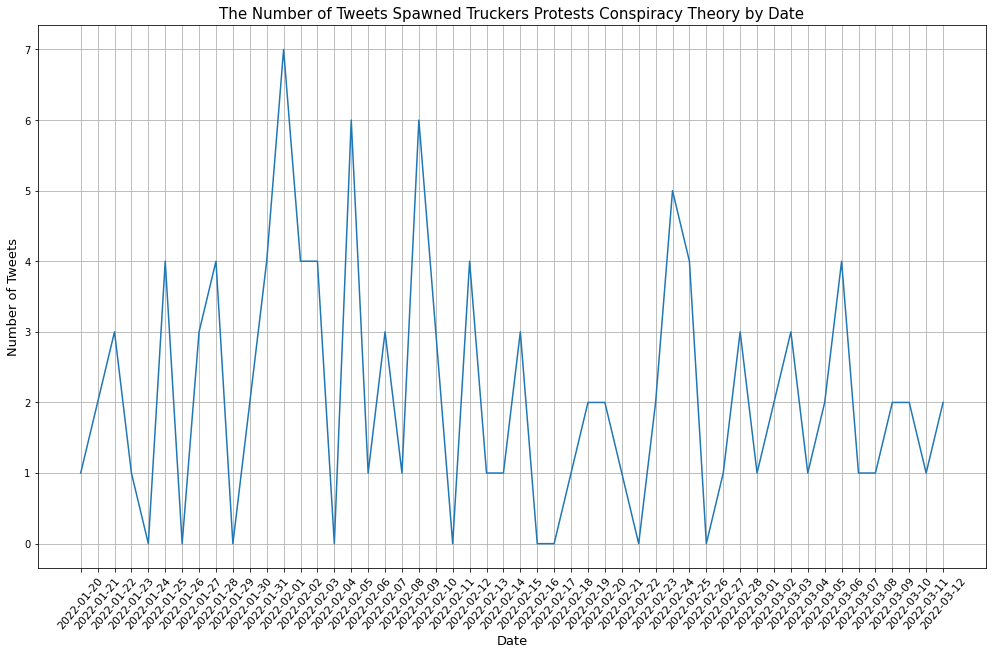

In [6]:
truckers_count_fig = count_plot(truckers_pivot_df, 'Truckers Protests')
# truckers_count_fig.savefig('truckers_prediction_count.png')

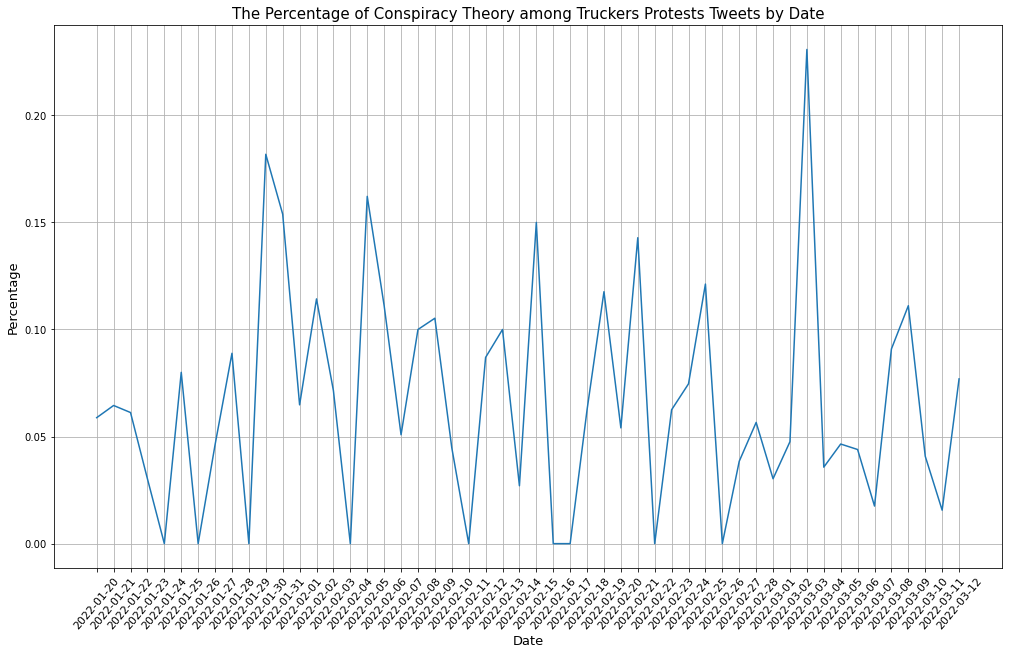

In [7]:
truckers_percentage_fig = percentage_plot(truckers_pivot_df, 'Truckers Protests')
# truckers_percentage_fig.savefig('truckers_prediction_percentage.png')  

In [8]:
covid_df = load_prediction_result(
    'bert/model_best_bert/test_covid_data_labeled.csv'
)
covid_pivot_df = result_by_date(covid_df)

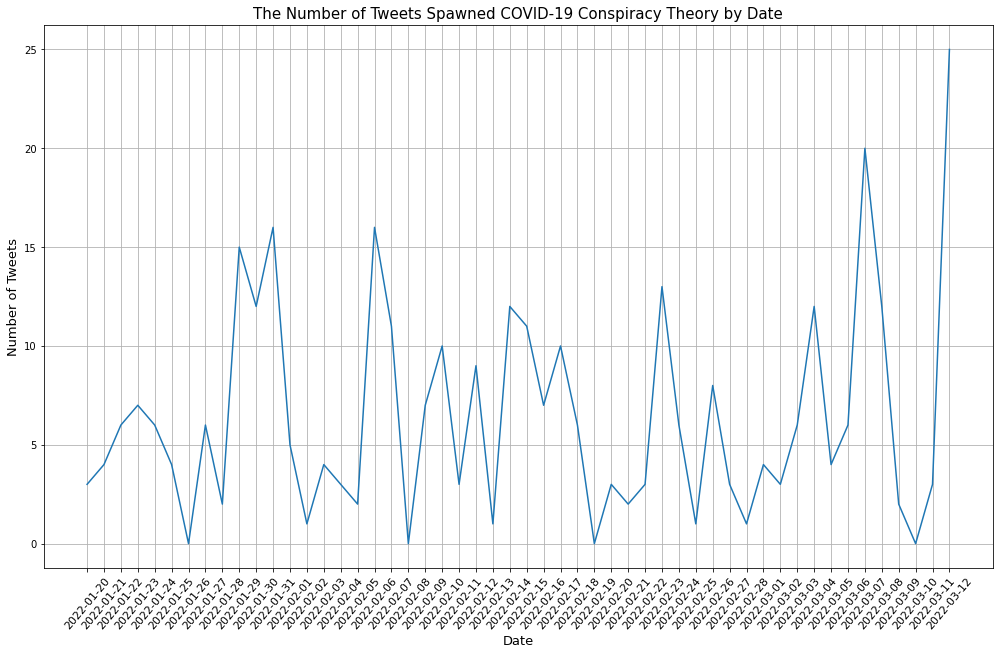

In [9]:
covid_count_fig = count_plot(covid_pivot_df, 'COVID-19')
# covid_count_fig.savefig('covid_prediction_count.png')

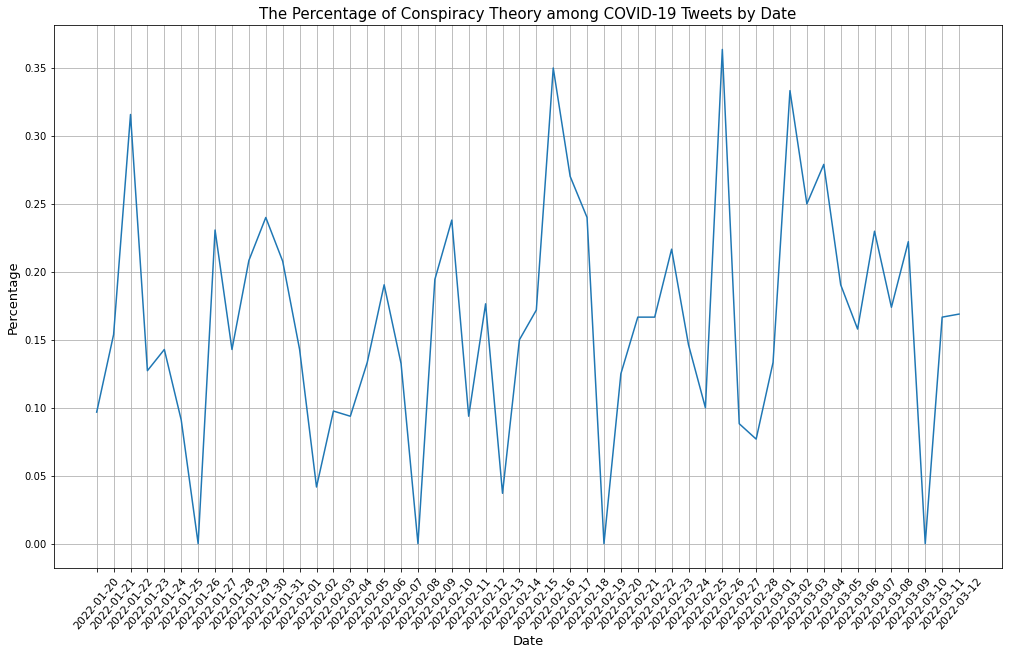

In [10]:
covid_percentage_fig = percentage_plot(covid_pivot_df, 'COVID-19')
# covid_percentage_fig.savefig('covid_prediction_percentage.png')